In [9]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [10]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [11]:
# Number of classes
K = len(set(y_train))
print("Number of classes:", K)

Number of classes: 10


In [13]:
# Build the model
i = Input(shape=x_train[0].shape)

x = Conv2D(filters=32, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(i)
x = BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)

x = Conv2D(filters=128, kernel_size=(3, 3), strides=2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)



x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [18]:
# Compile
# Note: ensure you are using the GPU for this!
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

In [ ]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

In [19]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.2304 - accuracy: 0.5651 - val_loss: 1.2862 - val_accuracy: 0.5380
Epoch 2/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.1521 - accuracy: 0.5983 - val_loss: 1.1329 - val_accuracy: 0.5930
Epoch 3/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.1136 - accuracy: 0.6090 - val_loss: 1.1768 - val_accuracy: 0.5785
Epoch 4/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0528 - accuracy: 0.6314 - val_loss: 1.0198 - val_accuracy: 0.6376
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.0187 - accuracy: 0.6430 - val_loss: 1.0279 - val_accuracy: 0.6382
Epoch 6/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.0092 - accuracy: 0.6493 - val_loss: 0.9946 - val_accuracy: 0.6509
Epoch 7/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.9759 - accuracy: 0.6577 - val_loss: 1.1682 -

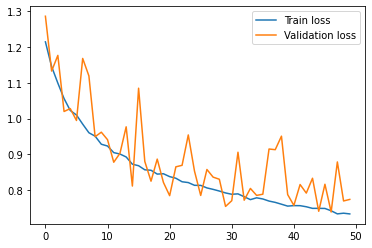

In [20]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='Train loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

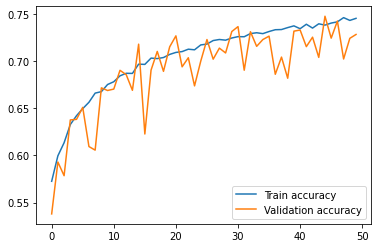

In [21]:
# Plot accuracy per iteration
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.legend()

Confusion matrix, without normalization
[[771  38  44  26   9   7  24  10  23  48]
 [ 11 890   4   4   1   6  11   2  15  56]
 [ 58   7 656  69  34  46  98  20   0  12]
 [ 25  13  76 568  36 119 122  17  13  11]
 [ 15   2 120  61 565  20 159  51   7   0]
 [ 15   7  52 203  25 570  82  36   2   8]
 [  4   7  27  46   6   7 892   4   6   1]
 [ 16  11  35  61  25  28  27 776   1  20]
 [ 75  48  14  31   4   4   9   3 771  41]
 [ 16  97   8  14   0   8  15  11   8 823]]


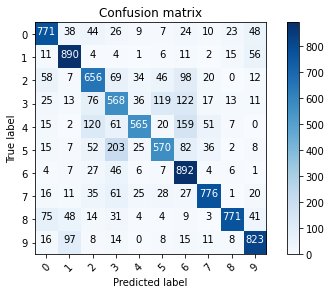

In [22]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

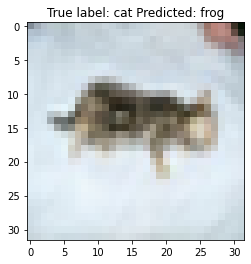

In [28]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

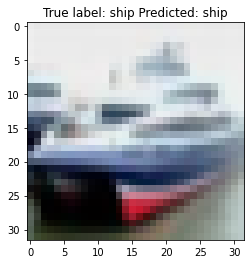

In [30]:
# Show some random examples
random_idx = p_test[0]
i = np.random.choice(random_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [31]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 4, 4, 64)          256       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 2, 2, 64)          36928 